<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 9: Deep Learning

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 9.0 Overview of Learning Objectives

In this recitation we will explore the following objectives:

- fill in information

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 9.1 A Simpe Example

<br>

In [2]:
!pip install torch

     |████████████████████████████████| 147.2 MB 160 kB/s  eta 0:00:01
  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

Let's look at a simpler example. To start with, some very simple data.


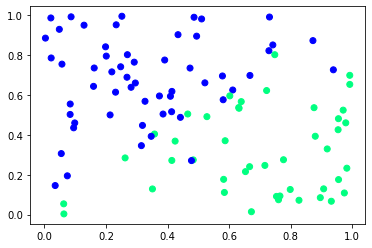

In [4]:
# let's make some points
x = np.random.uniform(size=100)
y = np.random.uniform(size=100)
# let's label them based on whether they're above or below y=x
# (with a little noise to make things interesting)
Y = np.greater(x+np.random.normal(scale=0.1,size=100),y)
X = np.array([x,y])
#  p l o t
plt.scatter(x,y,c=Y,cmap='winter')

Let's convert these numpy arrays to tensors using PyTorch for our model.

In [5]:
X = torch.from_numpy(X).type(torch.FloatTensor)
Y = torch.from_numpy(Y).type(torch.LongTensor)

Let's build our neural network!

In [6]:
class Classifier(nn.Module):
    def __init__(self):
        # let's inherit everything from Module
        super(Classifier,self).__init__()
        # our network will have 3 layers: one input, one hidden, and one output
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,2)
        
    def forward(self,x):
        # first layer output
        x = self.fc1(x)
        # using ReLU activation function
        x = F.relu(x)
        # getting the output
        x = self.fc2(x)
        return x
        
    # predicting the class of an input
    def predict(self,x):
        # apply softmax to output 
        pred = F.softmax(self.forward(x))
        ans = []
        # pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

Let's get set up to train this!

In [9]:
# init the model       
model = Classifier()
# define the loss function 
# here we use cross-entropy loss because this is binary classification
criterion = nn.CrossEntropyLoss()
# define the optimizer
# we use Adam, which adapts based on the gradient and previous SGD stpes
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Now it's time to train. 

In [10]:
# number of training epochs
epochs = 100
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X.T)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()

How'd we do?

In [12]:
!pip install sklearn

     |████████████████████████████████| 8.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 30.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=bd3559b1b608942d8d732141273b3c1be211c4ab163f1df4d54c522bc3fd4264
  Stored in directory: /Users/nicovaldes/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


0.85


/var/folders/s1/03rftstj2s96t6zy10c1dwpm0000gn/T/ipykernel_4426/1404670466.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


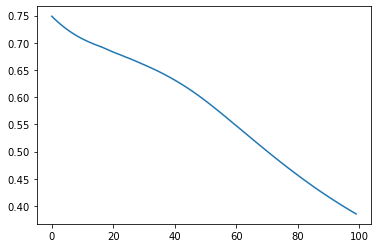

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X.T),Y))
plt.plot(losses)

Let's draw the decision boundary that our classifier came up with.

In [14]:
def predict(x):
 '''returns 0 or 1 given a single input'''
 x = torch.from_numpy(x).type(torch.FloatTensor)  # numpy to tensor
 ans = model.predict(x)
 return ans.numpy()

In [15]:
def plot_decision_boundary(pred,X,Y):
    h = 0.01
    # a grid with distance h
    xx,yy = np.meshgrid(np.arange(0,1,h), np.arange(0,1,h))
    # ppredict the function over the grid
    Z = pred(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap='winter')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.binary)

Let's plot the boundary!

/var/folders/s1/03rftstj2s96t6zy10c1dwpm0000gn/T/ipykernel_4426/1404670466.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


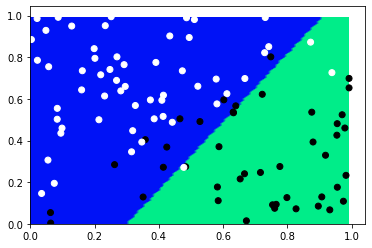

In [16]:
plot_decision_boundary(lambda x : predict(x) , X.T.numpy(), Y.numpy())

<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 9.2 A More Complicated Example

Let's try a more complicated configuration of data!

<br>

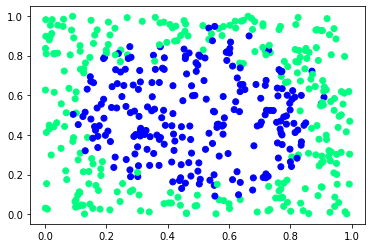

In [17]:
# let's make some points
x = np.random.uniform(size=500)
y = np.random.uniform(size=500)
# let's label them based on whether they're above or below y=x
Y = np.square(x-0.5)+np.square(y-0.5)>(0.15+np.random.normal(scale=0.03,size=500))
X = np.array([x,y])
#  p l o t
plt.scatter(x,y,c=Y,cmap='winter')

X = torch.from_numpy(X).type(torch.FloatTensor)
Y = torch.from_numpy(Y).type(torch.LongTensor)

Let's try our Classifier on this.

0.462


/var/folders/s1/03rftstj2s96t6zy10c1dwpm0000gn/T/ipykernel_4426/1404670466.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


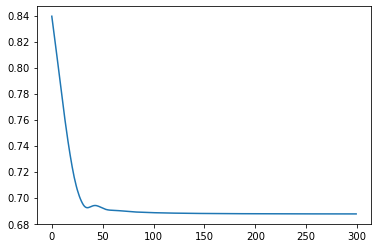

In [18]:
# init the model       
model = Classifier()
# define the loss function
criterion = nn.CrossEntropyLoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# number of training epochs
epochs = 300
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X.T)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()

print(accuracy_score(model.predict(X.T),Y))
plt.plot(losses)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


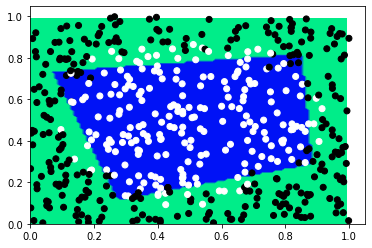

In [ ]:
plot_decision_boundary(lambda x : predict(x) , X.T.numpy(), Y.numpy())

<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->

Let's try to improve our classifier.

In [19]:
class DenserClassifier(nn.Module):
    def __init__(self):
        # let's inherit everything from Module
        super(DenserClassifier,self).__init__()
        # our network will have 4 layers: one input, two hidden, and one output
        self.fc1 = nn.Linear(2,10)
        self.fc2 = nn.Linear(10,10)
        self.fc3 = nn.Linear(10,2)
        
    def forward(self,x):
        # first layer output
        x = self.fc1(x)
        # using ReLU activation function
        x = F.relu(x)
        # getting the output
        x = self.fc2(x)
         # using ReLU activation function
        x = F.relu(x)
        # getting the output
        x = self.fc3(x)
        return x
        
    # predicting the class of an input
    def predict(self,x):
        # apply softmax to output 
        pred = F.softmax(self.forward(x))
        ans = []
        # pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

time 2 train 5 us

0.924


/var/folders/s1/03rftstj2s96t6zy10c1dwpm0000gn/T/ipykernel_4426/1937260319.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = F.softmax(self.forward(x))


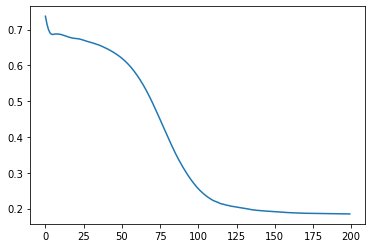

In [20]:
# init the model       
model = DenserClassifier()
# define the loss function
criterion = nn.CrossEntropyLoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# number of training epochs
epochs = 200
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X.T)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()

print(accuracy_score(model.predict(X.T),Y))
plt.plot(losses)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


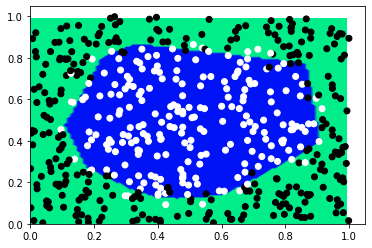

In [ ]:
plot_decision_boundary(lambda x : predict(x) , X.T.numpy(), Y.numpy())

<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 9.3 Regression Example 1


Okay, so that's classifying things. Can we do a regression? Let's use our old supernova data.

<br>

In [ ]:
!wget https://raw.githubusercontent.com/violatingcp/MIT_8.S50/main/Lecture2/sn_z_mu_dmu_plow_union2.1.txt
import csv

--2021-01-14 20:47:17--  https://raw.githubusercontent.com/violatingcp/MIT_8.S50/main/Lecture2/sn_z_mu_dmu_plow_union2.1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33742 (33K) [text/plain]
Saving to: ‘sn_z_mu_dmu_plow_union2.1.txt.3’

sn_z_mu_dmu_plow_un 100%[===================>]  32.95K  --.-KB/s    in 0.004s  

2021-01-14 20:47:17 (8.62 MB/s) - ‘sn_z_mu_dmu_plow_union2.1.txt.3’ saved [33742/33742]



Stealing Phil's Lecture 2 code for getting small redshift data...

<ErrorbarContainer object of 3 artists>

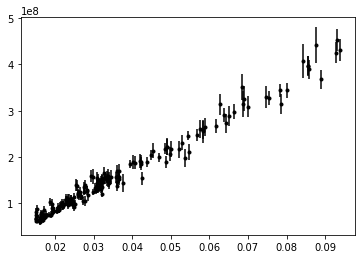

In [ ]:
label='sn_z_mu_dmu_plow_union2.1.txt'

def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=np.log(10)/5.
    return const*(10**power)*iMuErr

redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        if float(row[1]) > 0.1:
            continue
        redshift = np.append(redshift,float(row[1]))
        distance = np.append(distance,distanceconv(float(row[2])))
        distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')

In [ ]:
X = torch.from_numpy(np.array([list(redshift*100)])).type(torch.FloatTensor).T
Y = torch.from_numpy(np.array([list(distance/1e8)])).type(torch.FloatTensor).T

We'll use a new model to deal with our one-dimensional input.

In [ ]:
class Regression(nn.Module):
    def __init__(self):
        # let's inherit everything from Module
        super(Regression,self).__init__()
        # our network will have 3 layers: one input, one hidden, and one output
        self.fc1 = nn.Linear(1,5)
        self.fc2 = nn.Linear(5,1)
        
    def forward(self,x):
        # first layer output
        x = self.fc1(x)
        # using sigmoid activation function
        x = F.sigmoid(x)
        # getting the output
        x = self.fc2(x)
        return x

Training time.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


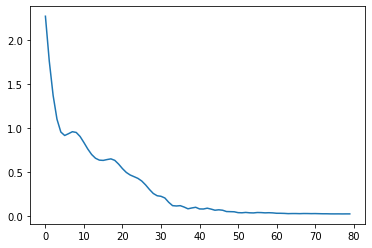

In [ ]:
# init the model       
model = Regression()
# define the loss function as mean squared error this time
criterion = nn.MSELoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# number of training epochs
epochs = 80
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()
plt.plot(losses)

What do we get!

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


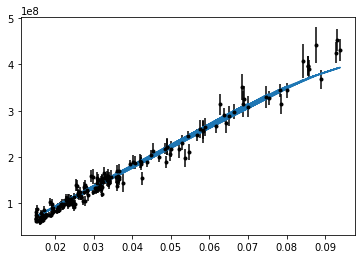

In [ ]:
# rescaling
Y_pred = model.forward(X).detach().numpy() * 1e8
# p l o t
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(redshift,Y_pred)

In [ ]:
idx1 = np.random.randint(0,len(X)-1,size=30)
idx2 = np.random.randint(0,len(X)-1,size=30)
slope = (Y_pred[idx1]-Y_pred[idx2])/(X[idx1]-X[idx2])*100   # 100 to rescale X
slope = slope.detach().numpy()
H = float(1e6*3e5/np.mean(slope))
print(H)

69.38892508050743


<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 9.4 Regression Example 2

One more regression for fun!

<br>

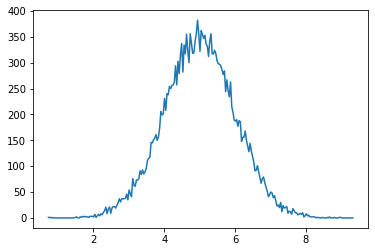

In [ ]:
# let's make some points
x = np.random.normal(loc=5,size=50000)
counts, bin_edges = np.histogram(x, bins=500)
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2

# some testing data
X_test = np.array([list(bin_centers)[1::10]])
Y_test = np.array([list(counts)[1::10]])

X = np.array([list(bin_centers)[::2]])
Y = np.array([list(counts)[::2]])
#  p l o t
plt.plot(X[0],Y[0])

X = torch.from_numpy(X).type(torch.FloatTensor).T
Y = torch.from_numpy(Y).type(torch.FloatTensor).T
X_test = torch.from_numpy(X_test).type(torch.FloatTensor).T
Y_test = torch.from_numpy(Y_test).type(torch.FloatTensor).T

In [ ]:
class DenseRegression(nn.Module):
    def __init__(self):
        # let's inherit everything from Module
        super(DenseRegression,self).__init__()
        # our network will have 3 layers: one input, one hidden, and one output
        self.fc1 = nn.Linear(1,256)
        self.fc2 = nn.Linear(256,1)
        
    def forward(self,x):
        # first layer output
        x = self.fc1(x)
        # using leaky ReLU activation function
        x = F.leaky_relu(x)
        # getting the output
        x = self.fc2(x)
        return x

Train!

In [ ]:
# init the model       
model = DenseRegression()
# define the loss function as mean squared error this time
criterion = nn.MSELoss()
# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1.3)

# number of training epochs
epochs = 500
# let's keep track of losses
losses = []
for i in range(epochs):
    # predict the model output for input
    Y_pred = model.forward(X)
    # calculate the loss
    loss = criterion(Y_pred,Y)
    losses.append(loss.item())
    # clear previous gradients
    optimizer.zero_grad()
    # compute gradient
    loss.backward()
    # update weights
    optimizer.step()

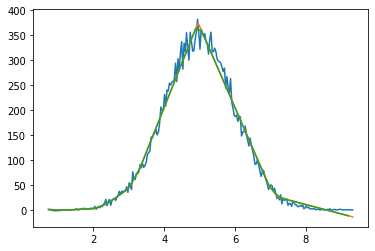

In [ ]:
Y_pred = model.forward(X).detach().numpy()
# p l o t
plt.plot(X,Y)
plt.plot(X,Y_pred)
# how does the test data do?
Y_pred_test = model.forward(X_test).detach().numpy()
plt.plot(X_test,Y_pred_test)

<!--start-block-->
### >>>QUESTION

<!--
<question multiplechoice>
csq_name = 'EX_02_02a'
csq_allow_viewanswer = True
csq_allow_check = False
csq_allow_save = True  
csq_renderer = 'radio'
csq_prompt='Question prompt needed'
csq_options=['option 1', 'option 2', 'option 3']
csq_soln = 1
csq_soln_mode = 'index' # (otherwies csq_soln = csq_options[0])
</question>  
-->


[QUESION TEXT HERE]


<br>
<!--end-block-->